In [1]:
import sys
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import keras

print('Python: {}'.format(sys.version))
print('Pandas: {}'.format(pd.__version__))
print('Numpy: {}'.format(np.__version__))
print('Sklearn: {}'.format(sklearn.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('Keras: {}'.format(keras.__version__))

Using TensorFlow backend.


Python: 3.6.9 (default, Apr 18 2020, 01:56:04) 
[GCC 8.4.0]
Pandas: 1.0.5
Numpy: 1.18.5
Sklearn: 0.22.2.post1
Matplotlib: 3.2.2
Keras: 2.3.1


In [2]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [3]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

names = ['age',
         'sex',
         'cp',
         'trestbps',
         'chol',
         'fbs',
         'restecg',
         'thalach',
         'exang',
         'oldpeak',
         'slope',
         'ca',
         'thal',
         'class']

cleveland = pd.read_csv(url, names=names)

In [4]:
print('Shape of DataFrame: {}'.format(cleveland.shape))
print(cleveland.loc[1])

Shape of DataFrame: (303, 14)
age          67
sex           1
cp            4
trestbps    160
chol        286
fbs           0
restecg       2
thalach     108
exang         1
oldpeak     1.5
slope         2
ca          3.0
thal        3.0
class         2
Name: 1, dtype: object


In [5]:
cleveland.loc[280:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
280,57.0,1.0,4.0,110.0,335.0,0.0,0.0,143.0,1.0,3.0,2.0,1.0,7.0,2
281,47.0,1.0,3.0,130.0,253.0,0.0,0.0,179.0,0.0,0.0,1.0,0.0,3.0,0
282,55.0,0.0,4.0,128.0,205.0,0.0,1.0,130.0,1.0,2.0,2.0,1.0,7.0,3
283,35.0,1.0,2.0,122.0,192.0,0.0,0.0,174.0,0.0,0.0,1.0,0.0,3.0,0
284,61.0,1.0,4.0,148.0,203.0,0.0,0.0,161.0,0.0,0.0,1.0,1.0,7.0,2
285,58.0,1.0,4.0,114.0,318.0,0.0,1.0,140.0,0.0,4.4,3.0,3.0,6.0,4
286,58.0,0.0,4.0,170.0,225.0,1.0,2.0,146.0,1.0,2.8,2.0,2.0,6.0,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
288,56.0,1.0,2.0,130.0,221.0,0.0,2.0,163.0,0.0,0.0,1.0,0.0,7.0,0
289,56.0,1.0,2.0,120.0,240.0,0.0,0.0,169.0,0.0,0.0,3.0,0.0,3.0,0


In [6]:
data = cleveland[~cleveland.isin(['?'])]
data.loc[280:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
280,57.0,1.0,4.0,110.0,335.0,0.0,0.0,143.0,1.0,3.0,2.0,1.0,7.0,2
281,47.0,1.0,3.0,130.0,253.0,0.0,0.0,179.0,0.0,0.0,1.0,0.0,3.0,0
282,55.0,0.0,4.0,128.0,205.0,0.0,1.0,130.0,1.0,2.0,2.0,1.0,7.0,3
283,35.0,1.0,2.0,122.0,192.0,0.0,0.0,174.0,0.0,0.0,1.0,0.0,3.0,0
284,61.0,1.0,4.0,148.0,203.0,0.0,0.0,161.0,0.0,0.0,1.0,1.0,7.0,2
285,58.0,1.0,4.0,114.0,318.0,0.0,1.0,140.0,0.0,4.4,3.0,3.0,6.0,4
286,58.0,0.0,4.0,170.0,225.0,1.0,2.0,146.0,1.0,2.8,2.0,2.0,6.0,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,NaN,7.0,0
288,56.0,1.0,2.0,130.0,221.0,0.0,2.0,163.0,0.0,0.0,1.0,0.0,7.0,0
289,56.0,1.0,2.0,120.0,240.0,0.0,0.0,169.0,0.0,0.0,3.0,0.0,3.0,0


In [7]:
data = data.dropna(axis=0)
data.loc[280:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
280,57.0,1.0,4.0,110.0,335.0,0.0,0.0,143.0,1.0,3.0,2.0,1.0,7.0,2
281,47.0,1.0,3.0,130.0,253.0,0.0,0.0,179.0,0.0,0.0,1.0,0.0,3.0,0
282,55.0,0.0,4.0,128.0,205.0,0.0,1.0,130.0,1.0,2.0,2.0,1.0,7.0,3
283,35.0,1.0,2.0,122.0,192.0,0.0,0.0,174.0,0.0,0.0,1.0,0.0,3.0,0
284,61.0,1.0,4.0,148.0,203.0,0.0,0.0,161.0,0.0,0.0,1.0,1.0,7.0,2
285,58.0,1.0,4.0,114.0,318.0,0.0,1.0,140.0,0.0,4.4,3.0,3.0,6.0,4
286,58.0,0.0,4.0,170.0,225.0,1.0,2.0,146.0,1.0,2.8,2.0,2.0,6.0,2
288,56.0,1.0,2.0,130.0,221.0,0.0,2.0,163.0,0.0,0.0,1.0,0.0,7.0,0
289,56.0,1.0,2.0,120.0,240.0,0.0,0.0,169.0,0.0,0.0,3.0,0.0,3.0,0
290,67.0,1.0,3.0,152.0,212.0,0.0,2.0,150.0,0.0,0.8,2.0,0.0,7.0,1


In [8]:
print(data.shape)
print(data.dtypes)

(297, 14)
age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
class         int64
dtype: object


In [9]:
data = data.apply(pd.to_numeric)
data.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
class         int64
dtype: object

In [10]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


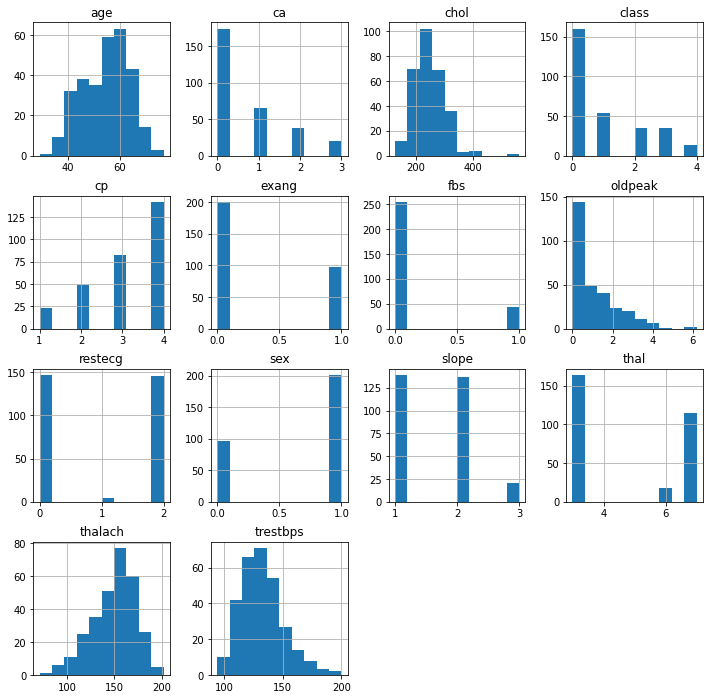

In [12]:
data.hist(figsize = (12, 12))
plt.show()

In [13]:
from sklearn import model_selection

X = np.array(data.drop(['class'], 1))
y = np.array(data['class'])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)

In [14]:
from keras.utils.np_utils import to_categorical

Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)

print(Y_train.shape)
print(Y_train[:10])

(237, 5)
[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]]


In [15]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

def create_model():
    model = Sequential()
    model.add(Dense(8, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(5, activation='softmax'))

    adam = Adam(lr=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

model = create_model()

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 112       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 25        
Total params: 173
Trainable params: 173
Non-trainable params: 0
_________________________________________________________________
None


In [16]:
model.fit(X_train, Y_train, epochs=100, batch_size=10, verbose = 1)

Epoch 1/100
237/237 [==============================] - 2s 7ms/step - loss: 1.4524 - accuracy: 0.2110
Epoch 2/100
237/237 [==============================] - 0s 246us/step - loss: 1.3740 - accuracy: 0.5443
Epoch 3/100
237/237 [==============================] - 0s 250us/step - loss: 1.3459 - accuracy: 0.5443
Epoch 4/100
237/237 [==============================] - 0s 250us/step - loss: 1.3209 - accuracy: 0.5443
Epoch 5/100
237/237 [==============================] - 0s 243us/step - loss: 1.3047 - accuracy: 0.5443
Epoch 6/100
237/237 [==============================] - 0s 268us/step - loss: 1.2787 - accuracy: 0.5443
Epoch 7/100
237/237 [==============================] - 0s 248us/step - loss: 1.2611 - accuracy: 0.5443
Epoch 8/100
237/237 [==============================] - 0s 288us/step - loss: 1.2433 - accuracy: 0.5443
Epoch 9/100
237/237 [==============================] - 0s 244us/step - loss: 1.2328 - accuracy: 0.5443
Epoch 10/100
237/237 [==============================] - 0s 253us/step - los

In [18]:
Y_train_binary = y_train.copy()
Y_test_binary = y_test.copy()

Y_train_binary[Y_train_binary > 0] = 1
Y_test_binary[Y_test_binary > 0] = 1

print(Y_train_binary[:20])

[0 0 1 0 0 1 1 0 1 0 0 0 0 1 1 1 0 0 0 1]


In [19]:
def create_binary_model():
    model = Sequential()
    model.add(Dense(8, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    adam = Adam(lr=0.001)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

binary_model = create_binary_model()
print(binary_model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 8)                 112       
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 5         
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________
None


In [21]:
binary_model.fit(X_train, Y_train_binary, epochs=100, batch_size=10, verbose = 1)

Epoch 1/100
237/237 [==============================] - 0s 783us/step - loss: 0.6959 - accuracy: 0.5443
Epoch 2/100
237/237 [==============================] - 0s 260us/step - loss: 0.6869 - accuracy: 0.5443
Epoch 3/100
237/237 [==============================] - 0s 322us/step - loss: 0.6814 - accuracy: 0.5443
Epoch 4/100
237/237 [==============================] - 0s 274us/step - loss: 0.6696 - accuracy: 0.6203
Epoch 5/100
237/237 [==============================] - 0s 256us/step - loss: 0.6622 - accuracy: 0.6245
Epoch 6/100
237/237 [==============================] - 0s 264us/step - loss: 0.6468 - accuracy: 0.6414
Epoch 7/100
237/237 [==============================] - 0s 264us/step - loss: 0.6321 - accuracy: 0.6456
Epoch 8/100
237/237 [==============================] - 0s 290us/step - loss: 0.6178 - accuracy: 0.6624
Epoch 9/100
237/237 [==============================] - 0s 276us/step - loss: 0.6169 - accuracy: 0.7004
Epoch 10/100
237/237 [==============================] - 0s 290us/step - l

In [22]:
from sklearn.metrics import classification_report, accuracy_score

categorical_pred = np.argmax(model.predict(X_test), axis=1)

print('Results for Categorical Model')
print(accuracy_score(y_test, categorical_pred))
print(classification_report(y_test, categorical_pred))

Results for Categorical Model
0.6
              precision    recall  f1-score   support

           0       0.77      0.97      0.86        31
           1       0.50      0.18      0.27        11
           2       0.20      0.11      0.14         9
           3       0.25      0.50      0.33         6
           4       0.00      0.00      0.00         3

    accuracy                           0.60        60
   macro avg       0.34      0.35      0.32        60
weighted avg       0.54      0.60      0.55        60



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
binary_pred = np.round(binary_model.predict(X_test)).astype(int)

print('Results for Binary Model')
print(accuracy_score(Y_test_binary, binary_pred))
print(classification_report(Y_test_binary, binary_pred))

Results for Binary Model
0.8166666666666667
              precision    recall  f1-score   support

           0       0.75      0.97      0.85        31
           1       0.95      0.66      0.78        29

    accuracy                           0.82        60
   macro avg       0.85      0.81      0.81        60
weighted avg       0.85      0.82      0.81        60

